# Episodic memory.

### First test case

In [1]:
from goodai.src.models import OpenSourceModel, Agent

In [2]:
model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"

In [3]:
model = OpenSourceModel(model_name)
agent = Agent(model)

[2024-03-03 21:34:22,276]:[root]:[INFO]: Connection to session database established.


First let's start with a clean ``session``, a session is a combinations of interactions with the ``agent``, these interactions are saved in a local ``sqlite`` database in order to preserve them, if we start a new session all information provided to the ``agent`` will be lost.

In [4]:
agent.new_session()

[2024-03-03 21:34:29,733]:[root]:[INFO]: Cleared session database.


Now, let's provide our ``agent`` with some informations.

In [5]:
agent.interact(
    "I have bought a side dresser for the bedroom, and some ingredients for dinner tonight. I am going to make omelets!"
)

"That's great! I'm sure the side dresser will look nice in your bedroom. And omelets are a delicious and easy meal to make for dinner. Do you need any recipe suggestions or cooking tips?"

Now let's mimic the end of our conversation by deleting the ``agent`` this will save our interactions in the database so the ``agent`` can keep track of past interactions.

In [6]:
del agent

[2024-03-03 21:34:44,533]:[root]:[INFO]: Memories saved in local session database


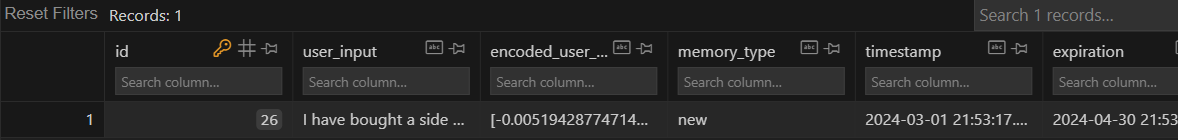

Now by creating a new instance of the ``agent``, it's ``memory manager`` will retrieve the past conversations we had and use it to provide context to the agent.

In [7]:
agent = Agent(model)

[2024-03-03 21:35:09,858]:[root]:[INFO]: Connection to session database established.


In [8]:
agent.interact(
    "I think I will prepare something for dinner tonight... Do you think I could use the ingredients I bought two days ago?"
)

'Yes, you can use the ingredients you bought two days ago to prepare dinner tonight.'

### Second test case

Let's refresh our ``agent`` memory and try with another use case.

In [10]:
agent.new_session()

[2024-03-03 21:36:40,274]:[root]:[INFO]: Cleared session database.


In [11]:
agent.interact(
    "I have purchased some items for the house: A mirror, two potted plants and a standing lamp."
)

"Great, you've purchased some items for the house! I'm here to help you with any questions or requests you have regarding those items. For example, you can ask me about the size or color of the mirror, or where you could place the potted plants and standing lamp for optimal lighting and decor. Let me know how I can assist you further!"

In [12]:
del agent

[2024-03-03 21:36:54,222]:[root]:[INFO]: Memories saved in local session database


In [13]:
agent = Agent(model)

[2024-03-03 21:36:55,408]:[root]:[INFO]: Connection to session database established.


In [14]:
agent.interact(
    "Yesterday I got home with some new items for the house. Do you remember what they were?"
)

'Yes, you purchased a mirror, two potted plants, and a standing lamp for the house.'